<a href="https://colab.research.google.com/github/xyzall1/TUBES-AKA/blob/main/TUBES_AKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis dan Perbandingan Algoritma Bubble Sort dan Merge Sort (Iteratif dan Rekursif) dalam Pengurutan Data Historis Suhu pada Aplikasi Cuaca**

*   **ROSA NUR ALIANA SAWAFI | 23111110008**
*   **ARDELIA RACHMA LAKSITA | 23111110051**



In [ ]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import sys

sys.setrecursionlimit(1000)

# Bubble Sort Iteratif
def bubble_sort_iteratif(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Bubble Sort rekursif
def bubble_sort_rekursif(arr, n=None):
    if n is None:
        n = len(arr)
    if n <= 1:
        return
    for i in range(n - 1):
        if arr[i] > arr[i + 1]:
            arr[i], arr[i + 1] = arr[i + 1], arr[i]
    bubble_sort_rekursif(arr, n - 1)

# Merge Sort rekursif
def merge_sort_rekursif(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort_rekursif(L)
        merge_sort_rekursif(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Merge Sort Iteratif
def merge_sort_iteratif(arr):
    width = 1
    n = len(arr)
    while width < n:
        for i in range(0, n, 2 * width):
            left = arr[i:i + width]
            right = arr[i + width:i + 2 * width]
            merged = []
            i_left = i_right = 0
            while i_left < len(left) and i_right < len(right):
                if left[i_left] < right[i_right]:
                    merged.append(left[i_left])
                    i_left += 1
                else:
                    merged.append(right[i_right])
                    i_right += 1
            merged.extend(left[i_left:])
            merged.extend(right[i_right:])
            arr[i:i + 2 * width] = merged
        width *= 2

In [ ]:
# Kelas untuk Analisis Algoritma
class AlgorithmAnalyzer:
    def __init__(self):
        self.sizes = []
        self.bubble_times = {'iterative': [], 'recursive': []}
        self.merge_times = {'iterative': [], 'recursive': []}

    def analyze_algorithms(self, df, max_size=1000, step=100):
        for size in range(step, min(len(df), max_size) + 1, step):
            sample_data = df.sample(n=size)['temperatur rata-rata(°C)'].apply(pd.to_numeric, errors='coerce').dropna().tolist()

            # Bubble Sort Iteratif
            bubble_data_iter = sample_data.copy()
            start_time = time.time()
            bubble_sort_iteratif(bubble_data_iter)
            self.bubble_times['iterative'].append(time.time() - start_time)

            # Bubble Sort Rekursif
            bubble_data_recur = sample_data.copy()
            start_time = time.time()
            bubble_sort_rekursif(bubble_data_recur)
            self.bubble_times['recursive'].append(time.time() - start_time)

            # Merge Sort Rekursif
            merge_data_recur = sample_data.copy()
            start_time = time.time()
            merge_sort_rekursif(merge_data_recur)
            self.merge_times['recursive'].append(time.time() - start_time)

            # Merge Sort Iteratif
            merge_data_iter = sample_data.copy()
            start_time = time.time()
            merge_sort_iteratif(merge_data_iter)
            self.merge_times['iterative'].append(time.time() - start_time)

            self.sizes.append(size)

    def plot_results(self):
        plt.figure(figsize=(14, 8))

        # Plot Bubble Sort times
        plt.plot(self.sizes, self.bubble_times['iterative'], 'r-o', label='Bubble Sort (Iteratif)')
        plt.plot(self.sizes, self.bubble_times['recursive'], 'r--o', label='Bubble Sort (Rekursif)')

        # Plot Merge Sort times
        plt.plot(self.sizes, self.merge_times['iterative'], 'b-o', label='Merge Sort (Iteratif)')
        plt.plot(self.sizes, self.merge_times['recursive'], 'b--o', label='Merge Sort (Rekursif)')

        plt.title('Perbandingan Kecepatan: Bubble Sort vs Merge Sort')
        plt.xlabel('Ukuran Input (n)')
        plt.ylabel('Waktu Eksekusi (detik)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def print_statistics(self):
        table = PrettyTable()
        table.field_names = ["Ukuran Input", "Bubble Iteratif (s)", "Bubble Rekursif (s)", "Merge Iteratif (s)", "Merge Rekursif (s)"]

        for i in range(len(self.sizes)):
            table.add_row([self.sizes[i],
                           f"{self.bubble_times['iterative'][i]:.6f}",
                           f"{self.bubble_times['recursive'][i]:.6f}",
                           f"{self.merge_times['iterative'][i]:.6f}",
                           f"{self.merge_times['recursive'][i]:.6f}"])

        print("\nHasil Perbandingan Algoritma:")
        print(table)

        avg_bubble_iter = sum(self.bubble_times['iterative']) / len(self.bubble_times['iterative'])
        avg_bubble_recur = sum(self.bubble_times['recursive']) / len(self.bubble_times['recursive'])
        avg_merge_iter = sum(self.merge_times['iterative']) / len(self.merge_times['iterative'])
        avg_merge_recur = sum(self.merge_times['recursive']) / len(self.merge_times['recursive'])

        print(f"\nRata-rata Waktu Eksekusi:")
        print(f"Bubble Sort Iteratif: {avg_bubble_iter:.6f} detik")
        print(f"Bubble Sort Rekursif: {avg_bubble_recur:.6f} detik")
        print(f"Merge Sort Iteratif: {avg_merge_iter:.6f} detik")
        print(f"Merge Sort Rekursif: {avg_merge_recur:.6f} detik")

        print(f"\nSelisih Rata-Rata (Iteratif vs Rekursif):")
        print(f"Bubble Sort: {abs(avg_bubble_iter - avg_bubble_recur):.6f} detik")
        print(f"Merge Sort: {abs(avg_merge_iter - avg_merge_recur):.6f} detik")

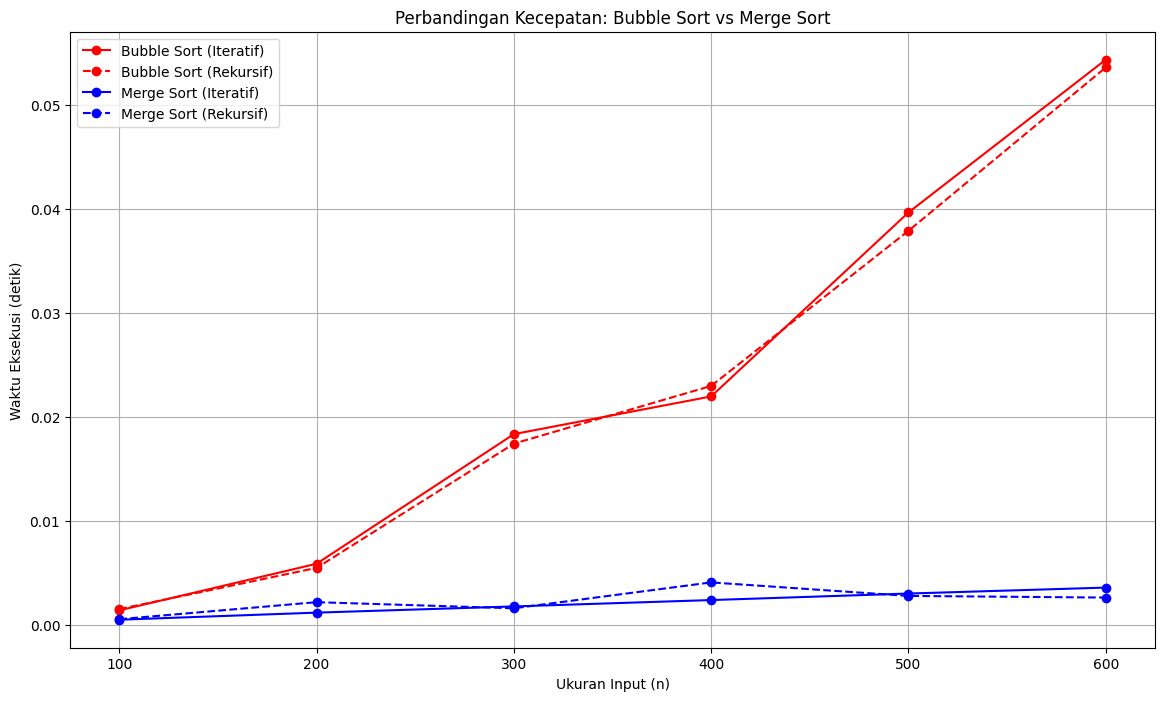


Hasil Perbandingan Algoritma:
+--------------+---------------------+---------------------+--------------------+--------------------+
| Ukuran Input | Bubble Iteratif (s) | Bubble Rekursif (s) | Merge Iteratif (s) | Merge Rekursif (s) |
+--------------+---------------------+---------------------+--------------------+--------------------+
|     100      |       0.001376      |       0.001498      |      0.000476      |      0.000526      |
|     200      |       0.005862      |       0.005462      |      0.001158      |      0.002164      |
|     300      |       0.018330      |       0.017414      |      0.001755      |      0.001576      |
|     400      |       0.021956      |       0.022968      |      0.002367      |      0.004065      |
|     500      |       0.039652      |       0.037887      |      0.002995      |      0.002766      |
|     600      |       0.054347      |       0.053600      |      0.003566      |      0.002607      |
+--------------+---------------------+----

In [ ]:
df = pd.read_excel('/content/Data Cuaca Harian SulawesiTenggara.xlsx')

df['temperatur rata-rata(°C)'] = pd.to_numeric(df['temperatur rata-rata(°C)'], errors='coerce')

analyzer = AlgorithmAnalyzer()

analyzer.analyze_algorithms(df, max_size=1000, step=100)

analyzer.plot_results()

analyzer.print_statistics()